Import Libiraries

In [46]:
#import libiraries
import spacy 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
nlp = spacy.load('en_core_web_lg')

In [6]:
df = pd.read_csv('Fake_Real_Data.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [10]:
df.shape

(9900, 2)

In [8]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [12]:
df['label_num'] = df['label'].map({'Fake' : 0 , 'Real' : 1})

In [22]:
df['vectors'] = df['Text'].apply(lambda text : nlp(text).vector)

In [24]:
df.head()

,Text,label,label_num,vectors
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [26]:
#split the data
X_train , X_test , y_train , y_test = train_test_split(df.vectors.values , df.label_num , test_size = 0.2 , random_state=2022)

In [30]:
#change it to 2d
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [32]:
X_test_2d

array([[-0.04045006,  0.15803917, -0.07007289, ..., -0.02070695,
        -0.03767742,  0.07828152],
       [-0.10133173,  0.15817572, -0.09110445, ..., -0.05770173,
         0.01264671,  0.05452826],
       [-0.08413067,  0.18664382, -0.01645634, ..., -0.05126239,
        -0.03087497, -0.00507031],
       ...,
       [-0.0646969 ,  0.13155003, -0.1018946 , ..., -0.06268797,
        -0.01129996,  0.0522517 ],
       [-0.0779852 ,  0.15085569, -0.06255803, ..., -0.04473808,
        -0.01742729,  0.04725816],
       [-0.06835494,  0.15212202, -0.04318341, ..., -0.07264125,
        -0.04558746,  0.06995795]], dtype=float32)

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

clf = MultinomialNB()
clf.fit(X_train_scaled , y_train)

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [44]:
clf = KNeighborsClassifier(n_neighbors=5 , metric='euclidean')
clf.fit(X_train_scaled , y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1024
           1       0.96      0.99      0.97       956

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



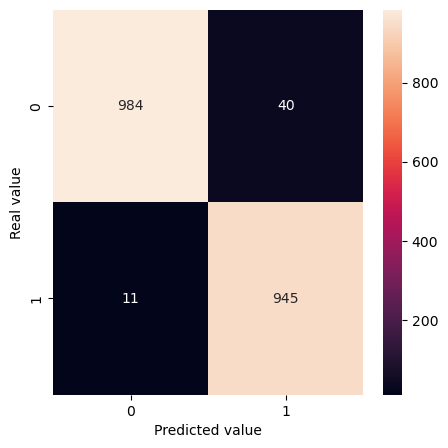

In [56]:
#confusion matrix

cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Real value')
plt.show()